# Lab 2: Scikit-learn, kNN, and Decision Trees


In this lab we'll get some hands on experience with scikitlearn as well as two of the classifiers we've seen in class
- K Nearest Neighbors
- Decision Trees

## Goals for this lab

- Get an overview of sklearn


- Understand the practical implications for changing the parameters used in KNearest Neighbor Classifier
  - k
  - distance metric
  - weighting method
  
  
- Understand the practical implications for changing the parameters used in Decision Trees
 - splitting criteria (gini vs information gain)
 - max depth
 - min sample size for split
 
 
- Understand how to interpret Decision Trees

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.tree as tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score as accuracy
import graphviz # If you don't have this, install via pip/conda
%matplotlib inline

/home/jingwen/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


# Data
We'll use these classifiers on a subset of the data set from https://www.kaggle.com/new-york-state/nys-patient-characteristics-survey-pcs-2015

The data has been downloaded, modified, and is in the github repo for the lab

You should also try this with other data sets you have been provided for the homeworks.

In [2]:
# Change this to wherever you're storing your data
datafile = '../data/nysmedicaldata.csv'
df = pd.read_csv(datafile)

In [3]:
df.head()

,Region Served,Age Group,Sex,Transgender,Sexual Orientation,Hispanic Ethnicity,Race,Living Situation,Household Composition,Preferred Language,...,No Insurance,Unknown Insurance Coverage,Medicaid Insurance,Medicaid Managed Insurance,Medicare Insurance,Private Insurance,Child Health Plus Insurance,Other Insurance,Criminal Justice Status,Three Digit Residence Zip Code
0,HUDSON RIVER REGION,ADULT,MALE,"NO, NOT TRANSGENDER",STRAIGHT OR HETEROSEXUAL,YES,OTHER,OTHER LIVING SITUATION,NOT APPLICABLE,ENGLISH,...,NO,NO,YES,NO,NO,NO,NO,NO,YES,113
1,NEW YORK CITY REGION,ADULT,MALE,"NO, NOT TRANSGENDER",STRAIGHT OR HETEROSEXUAL,"NO, NOT HISPANIC/LATINO",WHITE ONLY,INSTITUTIONAL SETTING,NOT APPLICABLE,ENGLISH,...,NO,NO,YES,NO,UNKNOWN,NO,NO,UNKNOWN,YES,113
2,HUDSON RIVER REGION,ADULT,MALE,"NO, NOT TRANSGENDER",STRAIGHT OR HETEROSEXUAL,"NO, NOT HISPANIC/LATINO",WHITE ONLY,PRIVATE RESIDENCE,COHABITATES WITH OTHERS,ENGLISH,...,NO,NO,YES,NO,NO,NO,NO,NO,YES,107
3,NEW YORK CITY REGION,ADULT,FEMALE,"NO, NOT TRANSGENDER",STRAIGHT OR HETEROSEXUAL,"NO, NOT HISPANIC/LATINO",OTHER,OTHER LIVING SITUATION,NOT APPLICABLE,ASIAN AND PACIFIC ISLAND,...,YES,NO,NO,NOT APPLICABLE,NO,NO,NO,NO,YES,888
4,LONG ISLAND REGION,ADULT,MALE,"NO, NOT TRANSGENDER",STRAIGHT OR HETEROSEXUAL,"NO, NOT HISPANIC/LATINO",BLACK ONLY,OTHER LIVING SITUATION,NOT APPLICABLE,ENGLISH,...,NO,NO,YES,UNKNOWN,YES,NO,NO,NO,NO,117


In [4]:
df.dtypes

Region Served                       object
Age Group                           object
Sex                                 object
Transgender                         object
Sexual Orientation                  object
Hispanic Ethnicity                  object
Race                                object
Living Situation                    object
Household Composition               object
Preferred Language                  object
Veteran Status                      object
Employment Status                   object
Number Of Hours Worked Each Week    object
Education Status                    object
Special Education Services          object
Mental Illness                      object
Intellectual Disability             object
Autism Spectrum                     object
Other Developmental Disability      object
Alcohol Related Disorder            object
Drug Substance Disorder             object
Mobility Impairment Disorder        object
Hearing Visual Impairment           object
Hyperlipide

# Some Quick Data Exploration
Before running any sort of model on your dataset, it's always a good idea to do some quick data exploration to get a sense of how your data looks like. Try to answer the following questions with some sort of plot/histogram/etc:

1) What do the distributions of each feature look like?

In [ ]:
# Ex


# Using scikitlearn for classification

sklearn is a very useful python packager for building machiune learning models. To build a model in sklearn, you need to have a matrix (or dataframe) with X and y columns. X is your set of features/predictors. y is a single column that is your label. We'll take the foll;owing steps:

1. Select/create column as label/outcome (y)
2. Select/create columns as features (X)
3. Create Training Set
4. Create Validation Set
5. Build model on Training Set
6. Predict risk scores for the Validation Set
7. Calculate performance metric(s)

## Some useful things to know in sklearn

fit = train an algorithm

predict_proba = predict a "risk" score for all possible classes for a given record (classification only)


## Important- never use .predict
There is also a function called "predict" which first runs predict_probs and then predicts a 1 if the score > 0.5 and 0 otherwise. *Never* use that function since 0.5 is a completely arbitrary threshold to call a prediction 1 vs 0.



## 1. Create label/outcome
One thing we can do with this dataset is to try to use the various feature columns to classify whether a person has High Blood Pressure. Let's create a column that is 1 if a person has High Blood Pressure and 0 otherwise

In [5]:
df['HBP'] = np.where(df['High Blood Pressure']=="YES", 1, 0)

### Question: what percentage of people have diabetes?

In [6]:
df['HBP'].mean()

0.21600738092492217

## 2. create or select existing predictors/features

For now, let's take a handful of existing columns to use.

sklearn needs features to be numeric and not categorical so we'll have to turn our selected features to be binary (also known as dummy variables)

In [7]:
cols_to_transform = [ 'Sex', 'Race', 'Obesity', 'Smokes', 'Alcohol Related Disorder','Drug Substance Disorder',
                    'Criminal Justice Status','Private Insurance']
df = pd.get_dummies( df, dummy_na=True, columns = cols_to_transform )
df.head()

,Region Served,Age Group,Transgender,Sexual Orientation,Hispanic Ethnicity,Living Situation,Household Composition,Preferred Language,Veteran Status,Employment Status,...,Drug Substance Disorder_YES,Drug Substance Disorder_nan,Criminal Justice Status_NO,Criminal Justice Status_UNKNOWN,Criminal Justice Status_YES,Criminal Justice Status_nan,Private Insurance_NO,Private Insurance_UNKNOWN,Private Insurance_YES,Private Insurance_nan
0,HUDSON RIVER REGION,ADULT,"NO, NOT TRANSGENDER",STRAIGHT OR HETEROSEXUAL,YES,OTHER LIVING SITUATION,NOT APPLICABLE,ENGLISH,NO,NOT IN LABOR FORCE:UNEMPLOYED AND NOT LOOKING ...,...,1,0,0,0,1,0,1,0,0,0
1,NEW YORK CITY REGION,ADULT,"NO, NOT TRANSGENDER",STRAIGHT OR HETEROSEXUAL,"NO, NOT HISPANIC/LATINO",INSTITUTIONAL SETTING,NOT APPLICABLE,ENGLISH,NO,NOT IN LABOR FORCE:UNEMPLOYED AND NOT LOOKING ...,...,1,0,0,0,1,0,1,0,0,0
2,HUDSON RIVER REGION,ADULT,"NO, NOT TRANSGENDER",STRAIGHT OR HETEROSEXUAL,"NO, NOT HISPANIC/LATINO",PRIVATE RESIDENCE,COHABITATES WITH OTHERS,ENGLISH,NO,NOT IN LABOR FORCE:UNEMPLOYED AND NOT LOOKING ...,...,0,0,0,0,1,0,1,0,0,0
3,NEW YORK CITY REGION,ADULT,"NO, NOT TRANSGENDER",STRAIGHT OR HETEROSEXUAL,"NO, NOT HISPANIC/LATINO",OTHER LIVING SITUATION,NOT APPLICABLE,ASIAN AND PACIFIC ISLAND,NO,NOT IN LABOR FORCE:UNEMPLOYED AND NOT LOOKING ...,...,0,0,0,0,1,0,1,0,0,0
4,LONG ISLAND REGION,ADULT,"NO, NOT TRANSGENDER",STRAIGHT OR HETEROSEXUAL,"NO, NOT HISPANIC/LATINO",OTHER LIVING SITUATION,NOT APPLICABLE,ENGLISH,NO,NOT IN LABOR FORCE:UNEMPLOYED AND NOT LOOKING ...,...,0,0,1,0,0,0,1,0,0,0


Now let's define a vector of column names with only those dummy variables.

In [9]:
selected_features = ['Sex_FEMALE','Sex_MALE','Sex_UNKNOWN','Race_BLACK ONLY','Race_MULTI-RACIAL','Race_OTHER',
                     'Race_UNKNOWN RACE','Race_WHITE ONLY', 'Obesity_YES', 'Obesity_NO', 'Obesity_nan', 
                     'Smokes_YES', 'Smokes_NO','Alcohol Related Disorder_NO','Alcohol Related Disorder_YES',
                    'Alcohol Related Disorder_UNKNOWN','Criminal Justice Status_YES','Criminal Justice Status_NO',
                    'Criminal Justice Status_UNKNOWN','Private Insurance_NO','Private Insurance_YES','Private Insurance_UNKNOWN']

# Train/Test Splits

Create a train/test set split using sklearn's [train_test_split](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) function. We'll use these train/test splits for evaluating all our classification models.

In [10]:
x = df[selected_features]
y = df['HBP']
test_size = 0.3 # you can adjust this
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size)

# K Nearest Neighbors
See the sklearn documentation on the [KNN classifier](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier) to see its parameters. The one's we'll mostly be interested in are:
- n_neighbors
- distance metric
- weighting function

## KNN Distance Function
Something important to note is that the KNN algorithm requires a "metric" or a notion of distance. If you don't set this parameter, it defaults to the Euclidean distance. Do you think the Euclidean distance is appropriate in this setting? You can set the metric parameter to any one of the distance metrics defined under the sklearn [DistanceMetric class](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.DistanceMetric.html)

Different metrics might have different parameters which you can set like so:

In [86]:
# If your metric has a metric parameter you need to pass that in via a
# dictionary to metric_params.
knn = KNeighborsClassifier(n_neighbors=10, metric='minkowski')

Remember that when training a model, **you should only use the training data!** The test set is reserved exclusively for evaluating your model. Now let's use the classifier:

In [20]:
knn.fit(x_train, y_train)
pred_scores = knn.predict_proba(x_test)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params={'p': 3}, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

In [25]:
print(pred_scores)

[[ 0.9  0.1]
 [ 0.8  0.2]
 [ 0.7  0.3]
 ..., 
 [ 0.8  0.2]
 [ 0.5  0.5]
 [ 0.9  0.1]]


In [26]:
type(pred_scores)

numpy.ndarray

## KNN Tasks:

1) Write a function that computes the accuracy of the predicted values for a given score threshold
If score > threshold then prediction = 1 else prediction = 0

In [44]:
# CODE
print("The true number of diabedes is {}/{} from the data, with percentage {:.2f}%\n".format(
    sum(y_test), len(y_test), 100.*sum(y_test)/len(y_test)))
for threshold in [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7]:
    pred_label = [1 if x[1]>threshold else 0 for x in pred_scores]
    print("(Threshold: {}), the total number of predicted diabedes is {}, the accuracy is {:.2f}".format(
        threshold, sum(pred_label), accuracy(pred_label,y_test)))
    print

The true number of diabedes is 546/2602 from the data, with percentage 20.98%

(Threshold: 0.1), the total number of predicted diabedes is 1850, the accuracy is 0.40

(Threshold: 0.2), the total number of predicted diabedes is 1106, the accuracy is 0.58

(Threshold: 0.3), the total number of predicted diabedes is 378, the accuracy is 0.73

(Threshold: 0.4), the total number of predicted diabedes is 135, the accuracy is 0.78

(Threshold: 0.5), the total number of predicted diabedes is 13, the accuracy is 0.79

(Threshold: 0.6), the total number of predicted diabedes is 8, the accuracy is 0.79

(Threshold: 0.7), the total number of predicted diabedes is 4, the accuracy is 0.79



As we can see from the result, as we increase the threshold, the number of predicted diabedes sharply decrease. However, the prediction becomes meaningless since simply predicting non-diabede for all samples would lead to 0.79 accuracy due to the label imbalance.

2) Play around with the n_neighbors value. Fit your data on the training data(x_train, y_train). Then evaluate it on both the training data, and the testing data. How does the accuracy of your train and test set predictions change as you increase n_neighbors?


In [85]:
# CODE
for num_neighbors in [1,3,10,20,50]:
    knn = KNeighborsClassifier(n_neighbors=num_neighbors, metric='minkowski')
    knn.fit(x_train, y_train)
    pred_scores = knn.predict_proba(x_test)
    pred_label = [1 if x[1]>0.4 else 0 for x in pred_scores]
    print("(num_neighbors: {}), the total number of predicted diabedes is {}, the accuracy is {:.2f}".format(
            num_neighbors, sum(pred_label), accuracy(pred_label,y_test)))
    print

(num_neighbors: 1), the total number of predicted diabedes is 306, the accuracy is 0.73

(num_neighbors: 3), the total number of predicted diabedes is 138, the accuracy is 0.78

(num_neighbors: 10), the total number of predicted diabedes is 135, the accuracy is 0.78

(num_neighbors: 20), the total number of predicted diabedes is 161, the accuracy is 0.77

(num_neighbors: 50), the total number of predicted diabedes is 159, the accuracy is 0.77



The extreme case is when we set the n_neighbors to be 1, which is to label the test sample by the label of the closest instance. The accuracy increases as we increase the number of neighbors and then decrease as the range gets too large such that it loses the feature information of the testing sample. 

4) You can see what datapoints are closest to a given query point via the [kneighbors function](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier.kneighbors). Which people are most closest to some of the highest scored people in the data?

In [84]:
# CODE
knn = KNeighborsClassifier(n_neighbors=10, metric='minkowski')
knn.fit(x_train, y_train)
pred_scores = knn.predict_proba(x_test)
# Now we select the test samples with the highest score (predicted higher chance of get diabede)
highest_score = pred_scores[:,1].max()
print("The highest score among all test samples is {}".format(highest_score))
high_score_people = x_test[pred_scores[:,1]==highest_score]

The highest score among all test samples is 0.8


In [74]:
high_score_people

,Sex_FEMALE,Sex_MALE,Sex_UNKNOWN,Race_BLACK ONLY,Race_MULTI-RACIAL,Race_OTHER,Race_UNKNOWN RACE,Race_WHITE ONLY,Obesity_YES,Obesity_NO,...,Smokes_NO,Alcohol Related Disorder_NO,Alcohol Related Disorder_YES,Alcohol Related Disorder_UNKNOWN,Criminal Justice Status_YES,Criminal Justice Status_NO,Criminal Justice Status_UNKNOWN,Private Insurance_NO,Private Insurance_YES,Private Insurance_UNKNOWN
2594,0,1,0,1,0,0,0,0,1,0,...,1,0,1,0,0,1,0,1,0,0
1867,0,1,0,1,0,0,0,0,1,0,...,1,0,1,0,0,1,0,1,0,0
8520,0,1,0,1,0,0,0,0,1,0,...,1,0,1,0,0,1,0,1,0,0
5174,0,1,0,1,0,0,0,0,1,0,...,1,0,1,0,0,1,0,1,0,0


There are four samples with the highest score, let's find out the people in training data that are closest to them.

In [78]:
knn.kneighbors(high_score_people, n_neighbors=5) # it will return the 5 closest people to each of the four samples

(array([[ 0.        ,  0.        ,  0.        ,  1.        ,  1.25992105],
        [ 0.        ,  0.        ,  0.        ,  1.        ,  1.25992105],
        [ 0.        ,  0.        ,  0.        ,  1.        ,  1.25992105],
        [ 0.        ,  0.        ,  0.        ,  1.        ,  1.25992105]]),
 array([[2885, 4048, 1359, 2913,   94],
        [2885, 4048, 1359, 2913,   94],
        [2885, 4048, 1359, 2913,   94],
        [2885, 4048, 1359, 2913,   94]]))

It seems that the four samples are the same thus leading to the same result, let's use the indices to see whether the people in the train set closest to high score actually have diabedes.

In [81]:
y_train.iloc[[2885, 4048, 1359, 2913,   94]]

1247    1
1325    1
4561    1
1711    1
1466    0
Name: HBP, dtype: int64

It's not surprising that 4 out 5 have diabedes.

5) Use a different distance metric for the KNN classifier. Evaluate the train/test set accuracies with the new KNN classifier.

In [82]:
# CODE
for metric in ["euclidean", "manhattan", "chebyshev", "minkowski"]:
    knn = KNeighborsClassifier(n_neighbors=10, metric=metric)
    knn.fit(x_train, y_train)
    pred_scores = knn.predict_proba(x_test)
    pred_label = [1 if x[1]>0.4 else 0 for x in pred_scores]
    print("(metric: {}), the total number of predicted diabedes is {}, the accuracy is {:.2f}".format(
            metric, sum(pred_label), accuracy(pred_label,y_test)))
    print

(metric: euclidean), the total number of predicted diabedes is 135, the accuracy is 0.78

(metric: manhattan), the total number of predicted diabedes is 135, the accuracy is 0.78

(metric: chebyshev), the total number of predicted diabedes is 121, the accuracy is 0.78

(metric: minkowski), the total number of predicted diabedes is 135, the accuracy is 0.78



It seems that different metrics don't have much difference in our task. But feel free to play with different settings of other hyperparameters and detect the difference.

6) Use a different weighting function for the KNN classifier. Evaluate the train/test set accuracies with the new KNN classifier.

In [88]:
# CODE
knn = KNeighborsClassifier(n_neighbors=10, metric="minkowski", weights="distance")
knn.fit(x_train, y_train)
pred_scores = knn.predict_proba(x_test)
pred_label = [1 if x[1]>0.4 else 0 for x in pred_scores]
print("(weights by distance), the total number of predicted diabedes is {}, the accuracy is {:.2f}".format(
        sum(pred_label), accuracy(pred_label,y_test)))

(weights by distance), the total number of predicted diabedes is 154, the accuracy is 0.77


By changing the weights function to "distance", which gives more weight to closer sample, the KNN classifier predicts more diabedes.

## Now write a nested for loop that loops over all the parameters and values and store the results in a data frame

### pseudocode

- for k in 1,2,3,4,5...10
  - for distance metric in (metric1, metric2,...)
    - for weighting function in (uniform, distance weighted)
      - train model
      - score test data
      - evaluate - calculate metrics
      - store parameters and evaluation metric in data frame
- print dataframe


     

In [90]:
# code
# left as exercise

### Exercise for later:
You can now use this data frame to analyze the results and see how the model performs as you modify the parameters.
How does the performance of knn change as you vary differenty parameters?


# Decision Trees

Moving onto decision trees. The [DecisionTreeClassifier constructor](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier) can take a number of parameters. You should look at all the available 
- criterion: string, "gini' for Gini Impurity or 'entropy' for information gain
- splitter: string,  "best" or 'random'
- max_features: the number of features to consider when looking for the best split.
- max_depth: int, the maximum depth of the tree.
- min_samples_split: minimum number of samples required to split an internal node
- min_samples_leaf: min number of samples required to be at a leaf node.
- max_leaf_nodes: max number of leaf nodes a tree can have

We can do the same fit/predict_proba/calculate accuracy:

### Let's first fit a decision tree model 

In [91]:
dec_tree = DecisionTreeClassifier()
dec_tree.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

### Now predict scores on the test set and plot the distribution of scores

(array([  222.,   949.,  1006.,   204.,   145.,    50.,     5.,     0.,
            0.,    21.]),
 array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ]),
 <a list of 10 Patch objects>)

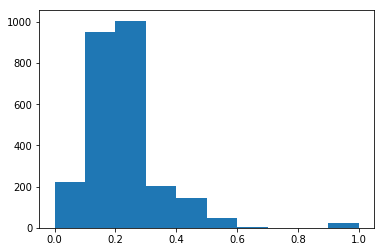

In [92]:
predicted_scores_test = dec_tree.predict_proba(x_test)[:,1]
plt.hist(predicted_scores_test)

### now we can select a threshold and calculate accuracy

In [93]:
threshold = 0.4
calc_threshold = lambda x,y: 0 if x < y else 1 
predicted_test = np.array( [calc_threshold(score, threshold) for score in predicted_scores_test] )
test_acc = accuracy(predicted_test, y_test)
print test_acc

0.759800153728


### let's now explore how the performance changes as we change parameters

We'll be interested in how each of these parameters will affect the performance of a Decision Tree classifier.

For example: Increasing max_depth this should increase your model's ability to explain the data and eventually overfit the training data once it's high enough. The performance on the test set should degrade a bit as the training set is overfitted.

In [94]:
threshold = 0.4
depths = [1, 3, 5, 7, 9, 20, 50, 100]
for d in depths:
    dec_tree = DecisionTreeClassifier(max_depth=d)
    dec_tree.fit(x_train, y_train)

    train_scores = dec_tree.predict_proba(x_train)[:,1]
    test_scores = dec_tree.predict_proba(x_test)[:,1]
   
    predicted_train = np.array( [calc_threshold(score, threshold) for score in train_scores] )
    train_acc = accuracy(predicted_train, y_train)   

    predicted_test = np.array( [calc_threshold(score, threshold) for score in test_scores] )
    test_acc = accuracy(predicted_test, y_test)
    
    print("Depth: {} | Train acc: {:.2f} | Test acc: {:.2f}".format(d, train_acc, test_acc))

Depth: 1 | Train acc: 0.78 | Test acc: 0.79
Depth: 3 | Train acc: 0.78 | Test acc: 0.79
Depth: 5 | Train acc: 0.77 | Test acc: 0.77
Depth: 7 | Train acc: 0.78 | Test acc: 0.77
Depth: 9 | Train acc: 0.78 | Test acc: 0.77
Depth: 20 | Train acc: 0.78 | Test acc: 0.76
Depth: 50 | Train acc: 0.78 | Test acc: 0.76
Depth: 100 | Train acc: 0.78 | Test acc: 0.76


## Decision Tree Tasks
1) Repeat the above with each parameter in DecisionTreeClassifier. What range of values makes sense for each parameter?
(IE: does it make sense to have max_depth greater than 7 or 8 for this dataset?)

In [ ]:
# CODE
# just copy the code above and change the hyperparameter you want to test.

2) What do you think will happen if you normalize/scale one of the features of your dataset before passing it into the DecisionTreeClassifier.fit function? Try modifying one of your columns and rerun the evaluations above.
Do the results change? Why does/doesnt this change the resulting model?

In [99]:
# CODE
x_train['Smokes_YES'] = x_train['Smokes_YES']*10
threshold = 0.4
depths = [1, 3, 5, 7, 9, 20, 50, 100]
for d in depths:
    dec_tree = DecisionTreeClassifier(max_depth=d)
    dec_tree.fit(x_train, y_train)

    train_scores = dec_tree.predict_proba(x_train)[:,1]
    test_scores = dec_tree.predict_proba(x_test)[:,1]
   
    predicted_train = np.array( [calc_threshold(score, threshold) for score in train_scores] )
    train_acc = accuracy(predicted_train, y_train)   

    predicted_test = np.array( [calc_threshold(score, threshold) for score in test_scores] )
    test_acc = accuracy(predicted_test, y_test)
    
    print("Depth: {} | Train acc: {:.2f} | Test acc: {:.2f}".format(d, train_acc, test_acc))

Depth: 1 | Train acc: 0.78 | Test acc: 0.79
Depth: 3 | Train acc: 0.78 | Test acc: 0.79
Depth: 5 | Train acc: 0.77 | Test acc: 0.77
Depth: 7 | Train acc: 0.78 | Test acc: 0.77
Depth: 9 | Train acc: 0.78 | Test acc: 0.76
Depth: 20 | Train acc: 0.78 | Test acc: 0.76
Depth: 50 | Train acc: 0.78 | Test acc: 0.76
Depth: 100 | Train acc: 0.78 | Test acc: 0.76


It leads to the same results after rescaling since decision tree only split based on thresholds which will also scale.

3) How does changing the "criterion" parameter affect your model. Is Gini better than Information Gain? Do not change the other parameters(max_depth, min_sample_split, etc) while doing this.

In [102]:
# CODE
for d in [1,3,5,20,100]:
    print("Depth: {}".format(d))
    for criterion in ["gini", "entropy"]:
        dec_tree = DecisionTreeClassifier(max_depth=d, criterion=criterion)
        dec_tree.fit(x_train, y_train)

        train_scores = dec_tree.predict_proba(x_train)[:,1]
        test_scores = dec_tree.predict_proba(x_test)[:,1]

        predicted_train = np.array( [calc_threshold(score, threshold) for score in train_scores] )
        train_acc = accuracy(predicted_train, y_train)   

        predicted_test = np.array( [calc_threshold(score, threshold) for score in test_scores] )
        test_acc = accuracy(predicted_test, y_test)

        print("Criterion: {} | Train acc: {:.2f} | Test acc: {:.2f}".format(criterion, train_acc, test_acc))

Depth: 1
Criterion: gini | Train acc: 0.78 | Test acc: 0.79
Criterion: entropy | Train acc: 0.78 | Test acc: 0.79
Depth: 3
Criterion: gini | Train acc: 0.78 | Test acc: 0.79
Criterion: entropy | Train acc: 0.78 | Test acc: 0.79
Depth: 5
Criterion: gini | Train acc: 0.77 | Test acc: 0.77
Criterion: entropy | Train acc: 0.77 | Test acc: 0.77
Depth: 20
Criterion: gini | Train acc: 0.78 | Test acc: 0.76
Criterion: entropy | Train acc: 0.78 | Test acc: 0.76
Depth: 100
Criterion: gini | Train acc: 0.78 | Test acc: 0.76
Criterion: entropy | Train acc: 0.78 | Test acc: 0.76


It doesn't seem to have any difference.

4) Decision Trees are widely used in practice because they're very interpretable. Check out the [feature_importances](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier.feature_importances_) attribute of the DecisionTreeClassifier. What features are the most informative according to this model?

In [111]:
# CODE
print(dec_tree.feature_importances_)
x_train.columns
d = {'Features': x_train.columns, "Importance":dec_tree.feature_importances_}
feature_importance = pd.DataFrame(data=d)
feature_importance = feature_importance.sort_values(by=['Importance'], ascending=False)
feature_importance

[ 0.02539649  0.02585434  0.00335498  0.04997238  0.03332045  0.05545884
  0.03890134  0.04178196  0.          0.15875438  0.          0.09002016
  0.08654387  0.04241995  0.06544789  0.02898822  0.0476735   0.04863151
  0.02704011  0.06127768  0.04535293  0.02380902]


,Features,Importance
9,Obesity_NO,0.158754
11,Smokes_YES,0.090020
12,Smokes_NO,0.086544
14,Alcohol Related Disorder_YES,0.065448
19,Private Insurance_NO,0.061278
5,Race_OTHER,0.055459
3,Race_BLACK ONLY,0.049972
17,Criminal Justice Status_NO,0.048632
16,Criminal Justice Status_YES,0.047673
20,Private Insurance_YES,0.045353


Based on the table above, Obesity_No, Smokes_YES, Smokes_NO are the top three important features to determine diabede.

## Visualizing a Decision Tree
We can visualize decision trees by exporting the model in graphviz format using the [sklearn.tree.export_graphviz function](http://scikit-learn.org/stable/modules/generated/sklearn.tree.export_graphviz.html). This can be very useful in diagnosing potential issues with your Decision Tree Classifier giving you poor results.

/home/jingwen/anaconda2/lib/python2.7/site-packages/sklearn/tree/export.py:399: DeprecationWarning: out_file can be set to None starting from 0.18. This will be the default in 0.20.
  DeprecationWarning)


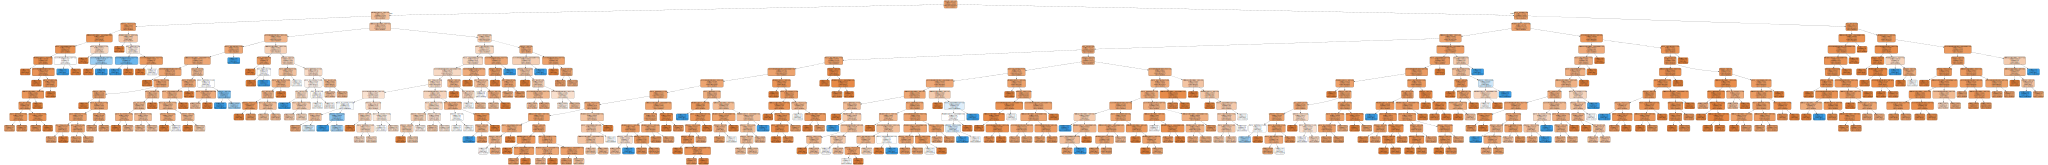

In [112]:

viz = tree.export_graphviz(dec_tree, feature_names=x_train.columns,
                           class_names=['Europe', 'Not Europe'],
                           rounded=True, filled=True)

with open("tree.dot") as f:
    dot_graph = f.read()
    graph = graphviz.Source(dot_graph)
graph

5) Visualize the decision tree of your best performing decision tree. Is there anything surprising about the splits that are most informative of this classification task?

In [ ]:
# CODE

### Exercise for later:
Now write a nested for loop that loops over all the parameters and values and store the results in a data frame.
You can now use this data frame to analyze the results and see how the model performs as you modify the parameters.
How does the performance of decision tree change as you vary differenty parameters?





In [ ]:
# CODE
# Left for exercise

# References
http://scikit-learn.org/stable/modules/neighbors.html#classification
    
http://scikit-learn.org/stable/modules/tree.html#tree